In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.chdir("gdrive/MyDrive/Colab Notebooks")

In [4]:
dataset = pd.read_excel('OnlineRetail.xlsx')
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
495,536409,20669,RED HEART LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
496,536409,90129F,RED GLASS TASSLE BAG CHARM,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
497,536409,90210B,CLEAR ACRYLIC FACETED BANGLE,1,2010-12-01 11:45:00,2.95,17908,United Kingdom


In [5]:
data = np.asarray(dataset[['Quantity','UnitPrice']]) 	

In [6]:
print(data)

[[ 6.000e+00  2.550e+00]
 [ 6.000e+00  3.390e+00]
 [ 8.000e+00  2.750e+00]
 [ 6.000e+00  3.390e+00]
 [ 6.000e+00  3.390e+00]
 [ 2.000e+00  7.650e+00]
 [ 6.000e+00  4.250e+00]
 [ 6.000e+00  1.850e+00]
 [ 6.000e+00  1.850e+00]
 [ 3.200e+01  1.690e+00]
 [ 6.000e+00  2.100e+00]
 [ 6.000e+00  2.100e+00]
 [ 8.000e+00  3.750e+00]
 [ 6.000e+00  1.650e+00]
 [ 6.000e+00  4.250e+00]
 [ 3.000e+00  4.950e+00]
 [ 2.000e+00  9.950e+00]
 [ 3.000e+00  5.950e+00]
 [ 3.000e+00  5.950e+00]
 [ 4.000e+00  7.950e+00]
 [ 4.000e+00  7.950e+00]
 [ 6.000e+00  4.250e+00]
 [ 3.000e+00  4.950e+00]
 [ 3.000e+00  4.950e+00]
 [ 3.000e+00  4.950e+00]
 [ 3.000e+00  5.950e+00]
 [ 2.400e+01  3.750e+00]
 [ 2.400e+01  3.750e+00]
 [ 1.200e+01  3.750e+00]
 [ 1.200e+01  8.500e-01]
 [ 2.400e+01  6.500e-01]
 [ 4.800e+01  8.500e-01]
 [ 2.400e+01  1.250e+00]
 [ 1.800e+01  2.950e+00]
 [ 2.400e+01  2.950e+00]
 [ 2.400e+01  1.950e+00]
 [ 2.400e+01  1.950e+00]
 [ 2.400e+01  1.950e+00]
 [ 2.000e+01  8.500e-01]
 [ 2.400e+01  1.650e+00]


In [7]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

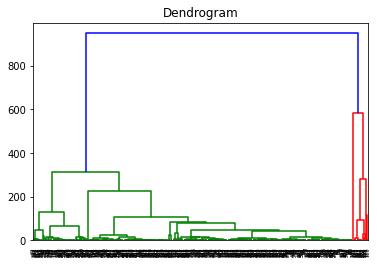

In [8]:
plt.title("Dendrogram")
Dendrogram = sch.dendrogram((sch.linkage(data, method='ward')))

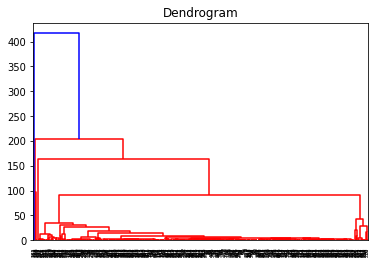

In [9]:
plt.title("Dendrogram")
Dendrogram = sch.dendrogram((sch.linkage(data, method='average')))

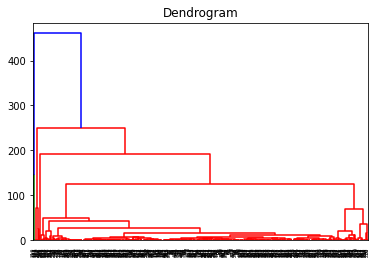

In [10]:
plt.title("Dendrogram")
Dendrogram = sch.dendrogram((sch.linkage(data, method='complete')))

In [11]:
from sklearn.cluster import AgglomerativeClustering

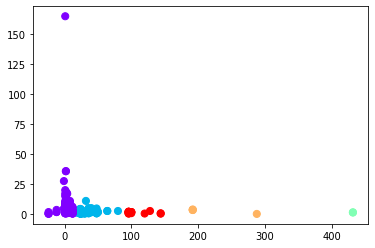

In [12]:
ac = AgglomerativeClustering(n_clusters = 5)
output = ac.fit_predict(data)

plt.scatter(data[:,0], data[:,1], c = output, s=50, cmap="rainbow")
plt.show()

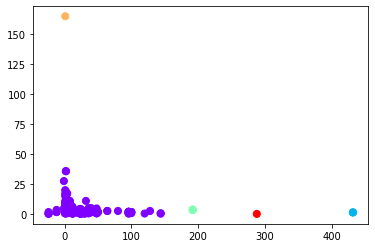

In [13]:
ac = AgglomerativeClustering(n_clusters = 5, affinity = 'manhattan', linkage="average")
output = ac.fit_predict(data)

plt.scatter(data[:,0], data[:,1], c = output, s=50, cmap="rainbow")
plt.show()

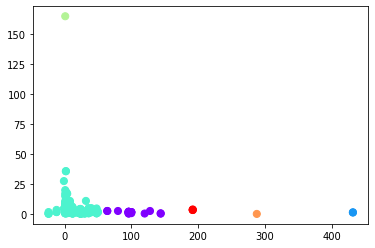

In [15]:
ac6 = AgglomerativeClustering(n_clusters = 6, affinity = 'manhattan', linkage="average")
output = ac6.fit_predict(data)

plt.scatter(data[:,0], data[:,1], c = output, s=50, cmap="rainbow")
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

In [31]:
db_index = davies_bouldin_score(data, output)
print(db_index)

0.13641241250798594


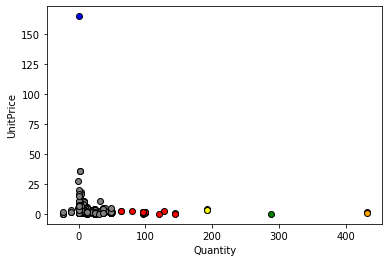

In [29]:
unique_output = list(set(output))
colors = ['red', 'orange', 'grey', 'blue', 'green', 'yellow']

for i in unique_output:
    filtered_label = data[output == i]
    plt.scatter(filtered_label[:,0],
                filtered_label[:,1],
                color = colors[i],
                edgecolor='k')

plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()